# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 读取数据

##### 导入数据分析所需要的库并通过Pandas的read_csv函数将原始数据文件Penguins.csv里的数据内容，解析为DataFrame并赋值给变量original_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 评估和清理数据

##### 在这一部分中，我们将对在上一部分建立的original_data Dataframe所包含的数据进行评估和清理
##### 主要从两个方面进行：结构和内容即整齐度和干净度
##### 数据的结构性问题是指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格“这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等
##### 为了区分经过清理的数据和原始数据我们创建新的变量cleand_data，让他为original_data赋值出的副本。我们之后的清理步骤都将被运用在cleaned_data上

In [3]:
cleaned_data = original_data.copy()

## 数据整齐度

In [4]:
cleaned_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##### 从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题

## 数据干净度

##### 接下来通过info，对数据内容进行大致了解

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##### 从输出结果来看，cleaned_data数据共有344条观察值，culmen_length_mm、culmen_depth_mm、flipper_length_mm 、body_mass_g、sex变量存在缺失值，将在后续进行评估和清理。数据类型方面，我们已知species（企鹅种类）sex（企鹅性别）、island（企鹅所在岛）都是分类数据、因此可以把数据类型都转换为Categoty

In [6]:
cleaned_data['species'] = cleaned_data['species'].astype("category")

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    object  
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    object  
dtypes: category(1), float64(4), object(2)
memory usage: 16.7+ KB


In [8]:
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")


In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


## 处理缺失数据

##### 从输出结果来看，cleaned_data数据共有344条观察值，culmen_length_mm、culmen_depth_mm、flipper_length_mm 、body_mass_g sex变量存在缺失值

##### 先提取这些变量的观察值进行查看

In [10]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


##### pandas的query()方法允许你使用字符串表达式来筛选DataFrame的行 
##### numpy里边查找NaN值的话，就用np.isnan()。
##### pandas里边查找NaN值的话，要么.isna()，要么.isnull()

In [11]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


##### 以上可以看到索引为3和339的观察值 除了种类和所属岛屿以外所有变量为空，无法为探索企鹅身体属性相关因素提供价值 因此可以把这两行直接删除

In [14]:
cleaned_data.drop(3, inplace = True)
cleaned_data.drop(339, inplace = True)

In [15]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


##### 缺失性别变量的观察值具备其他数据，仍然可以为分析提供价值由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值 可以保留这些行

## 处理重复数据

##### 根据数据变量的含义以及内容来看，允许变量重复 我们不需要对此数据检查是否存在重复值

## 处理不一致数据

##### 不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况

In [16]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [17]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [18]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

##### 从以上输出来看，species和island列里并不存在不一致数据，但sex列里存在一个英文句号值，并不代表任何有效性别，我来们应当把该值替换为NaN空值

In [19]:
cleaned_data["sex"] = cleaned_data["sex"].replace(".", np.nan)

C:\Users\17963\AppData\Local\Temp\ipykernel_6856\3870351856.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data["sex"] = cleaned_data["sex"].replace(".", np.nan)


In [20]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

##### 英文句号值已经被替换为空值，因此sex列里不存在不一致数据

## 处理无效或错误数据

##### 可以通过DataFrame的describe方法 对数值统计信息进行快速了解

In [21]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### 以上统计信息来看 cleaned_house_price 里不存在脱离现实意义的数据

## 数据探索

##### 我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察

In [22]:
# 设置图标色盘为“pastel”
sns.set_palette("pastel")

In [23]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类比例

In [24]:
species_count = cleaned_data["species"].value_counts()

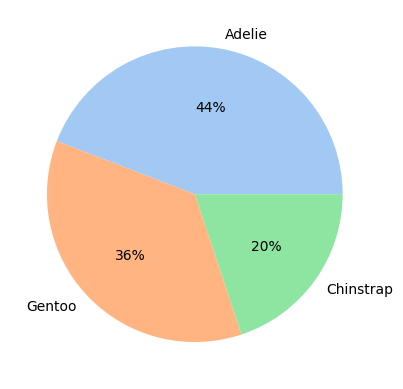

In [25]:
plt.pie(species_count, autopct= '%.0f%%' , labels=species_count.index)
plt.show()

##### 样本中Adelie这个种类的企鹅占比最大Gentoo种类的占比次之Chinstrap的占比最小为1\5左右

## 企鹅所属岛屿比例

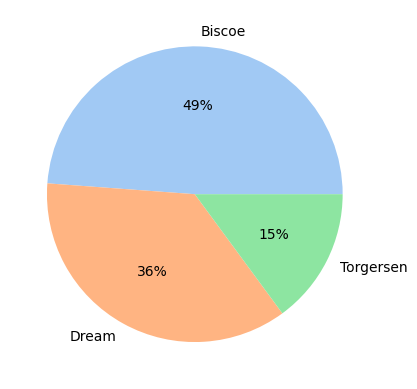

In [27]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct="%.0f%%", labels= island_count.index)
plt.show()

##### 样本中一半左右的企鹅样本都来自Biscoe岛屿，占比最大，其次是Dream岛屿，来自Torgersen岛屿的样本最少

## 企鹅性别比例

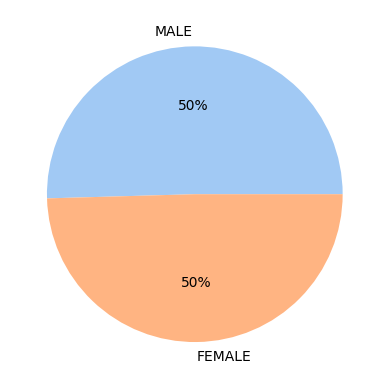

In [28]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct="%.0f%%")
plt.show()

##### 样本企鹅的性别占比持平，符合随机抽样

## 不同岛上的企鹅种类数量

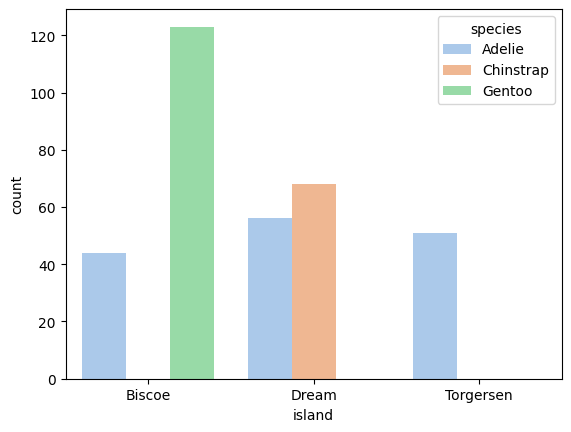

In [29]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

##### 从以上可以看出，Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有而Chinstrap种类只在Dream岛上有Gentoo只在Biscoe岛上才有

## 不同岛屿上的企鹅性别数量

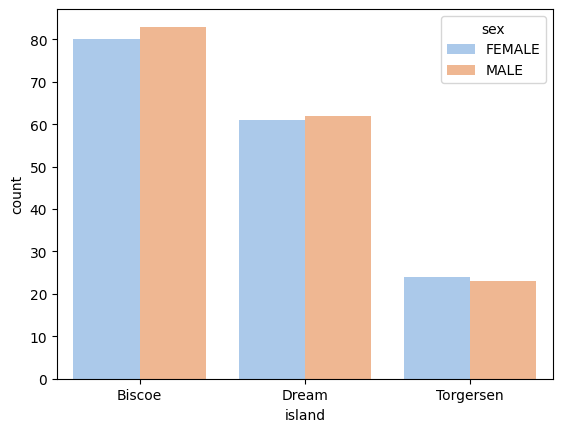

In [30]:
sns.countplot(cleaned_data, x="island", hue='sex')
plt.show()

## 查看数值之间的相关关系

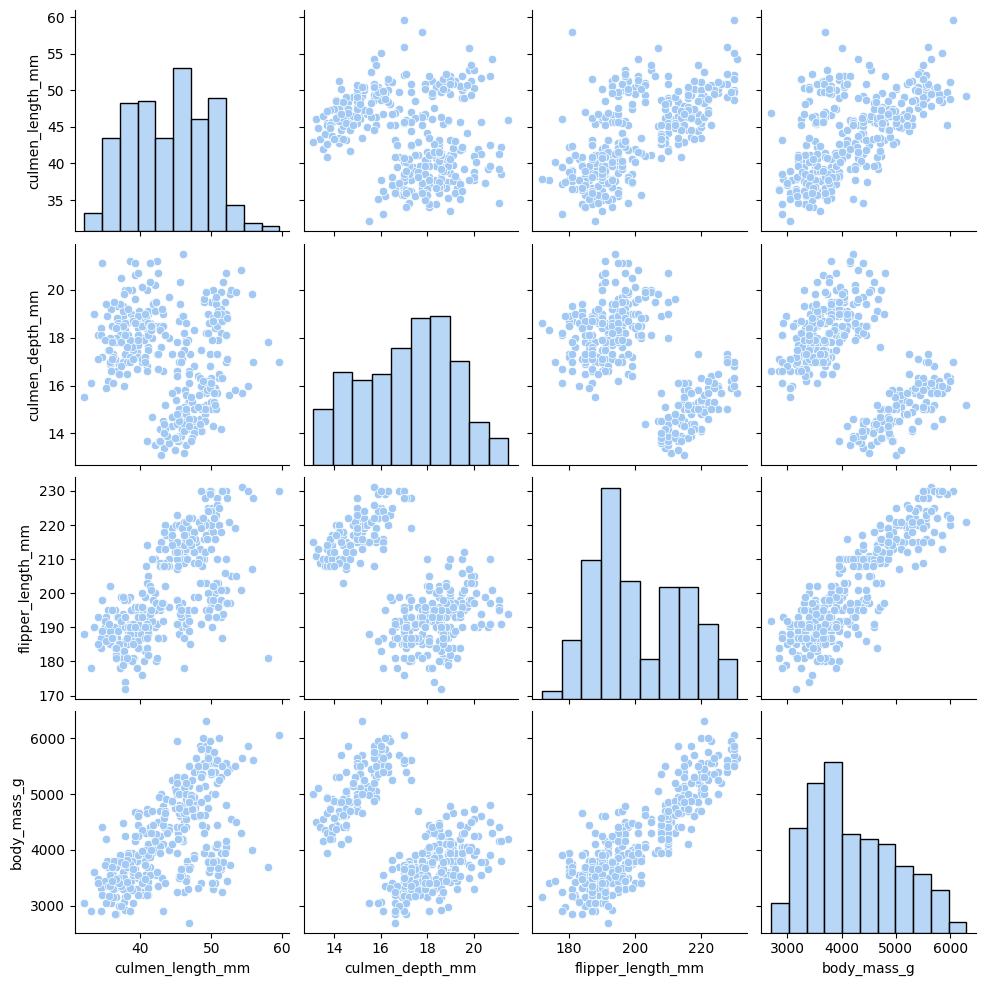

In [31]:
sns.pairplot(cleaned_data)
plt.show()

##### 从直方图来看，企鹅样本的嘴峰长度，嘴峰深度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。
##### 另外可以在散点图中看出明显的多个集群，可能与某些因素有关，比如企鹅种类、性别，因此可以对比进行进一步分类

## 根据种类查看数值之间的相关关系

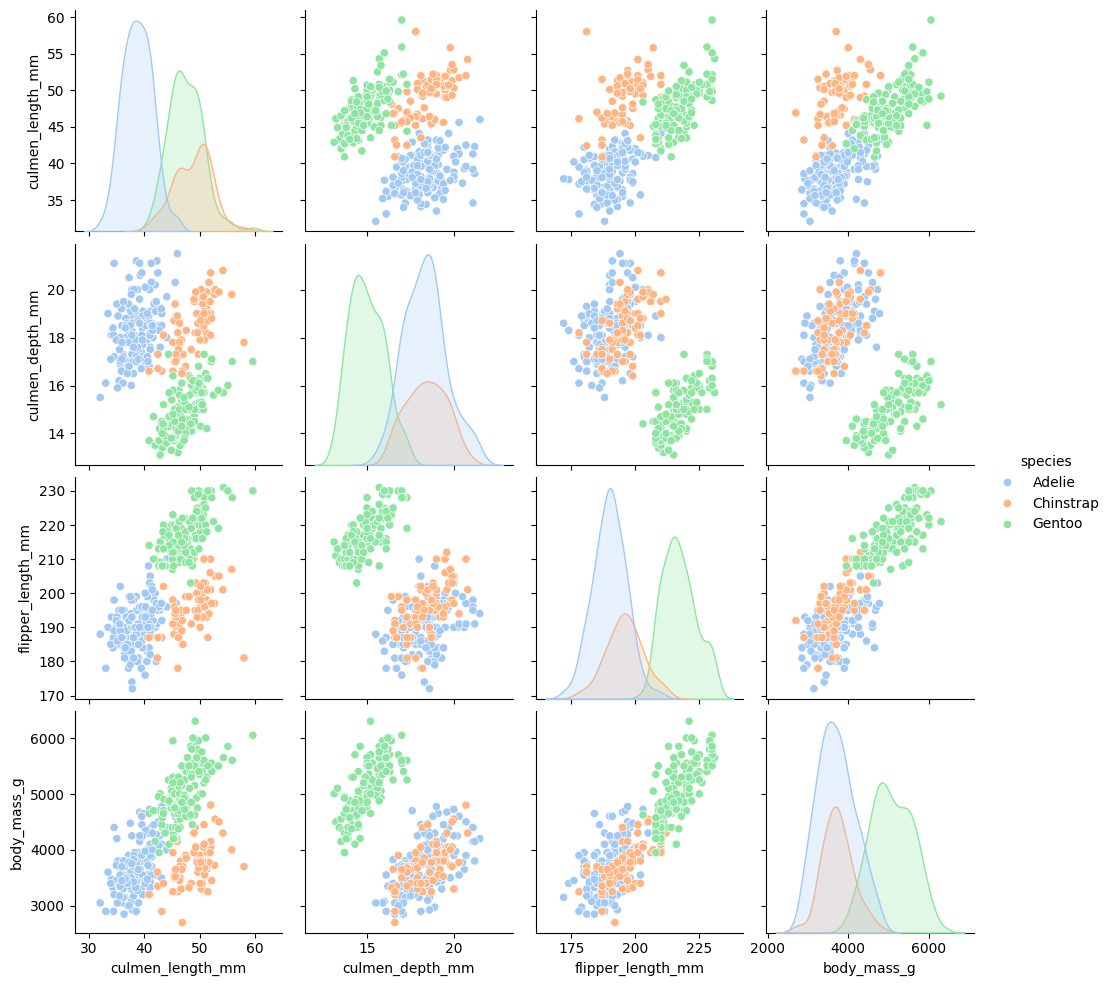

In [32]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

##### 同一种类的企鹅样本数据，在散点图上基本都聚在一起 说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上存在相似性这些发现有利于我们根据体重、鳍长度等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值

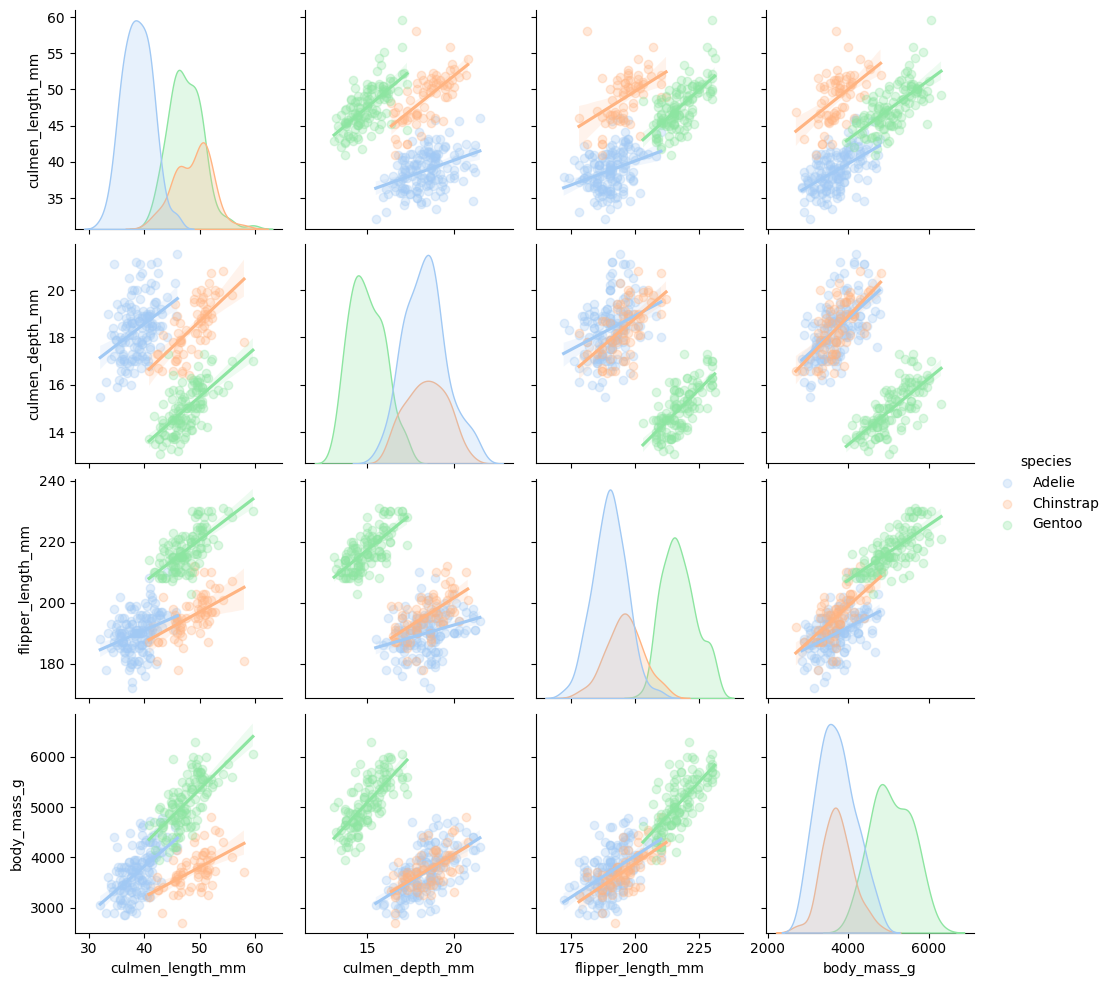

In [34]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

##### 散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比 即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻

##### 从密度图的分布来看，可以得到以下关于样本的发现
###### Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短
###### Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短
###### Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度最长
###### Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大

##### 但不同种类的属性数值是否存在统计显著性差异仍需要进行假设检验后才能得到结论

## 根据性别查看数值之间的相关关系

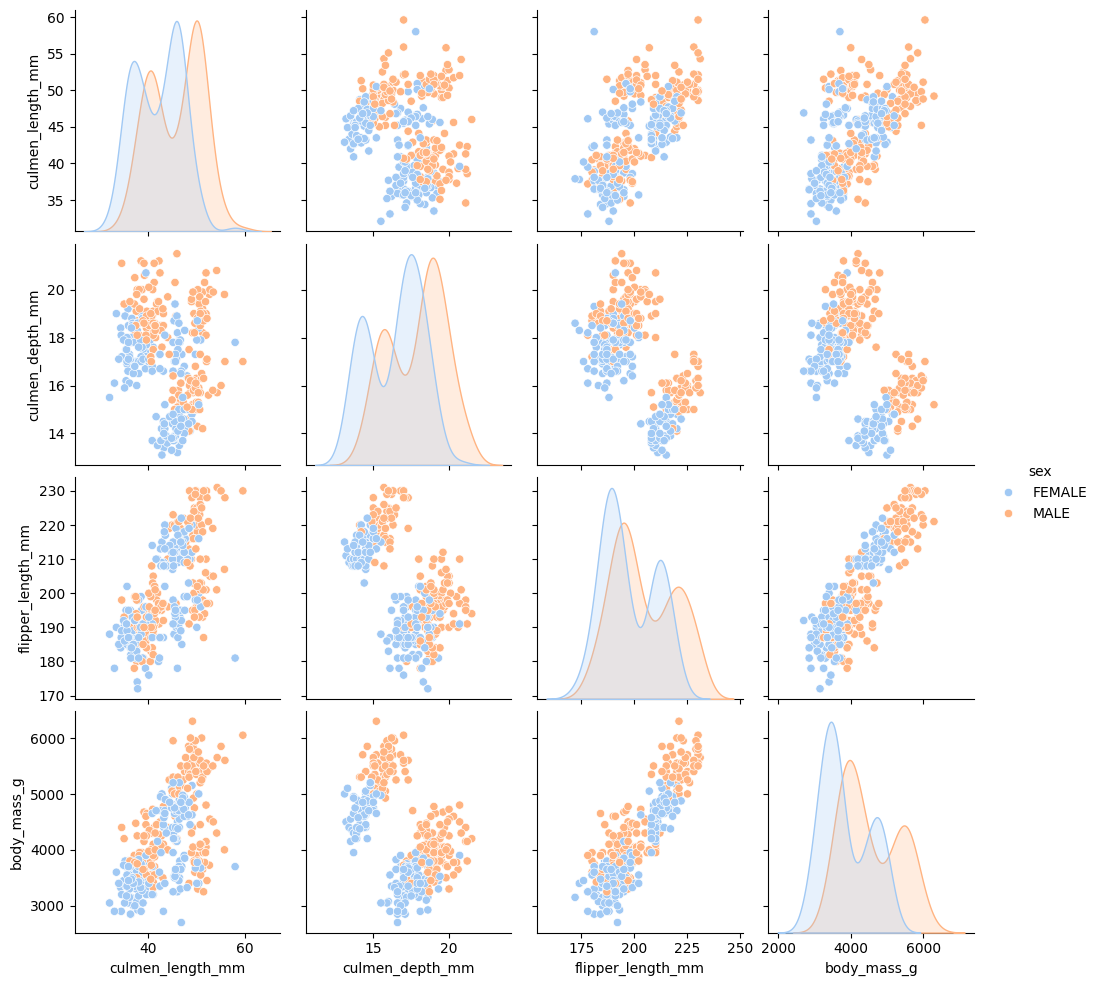

In [35]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

##### 根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅